In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)

In [3]:
df = pd.read_csv('All_players_stats.csv')

In [4]:
df.head()

,Season,Gamecode,Home,Player_ID,IsStarter,IsPlaying,Team,Dorsal,Player,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived,Valuation,Plusminus,gamecode,group,datetime,TeamScore,OpponentScore,PlayerName,total_fp
0,2023,1,1,P004720,0.0,1.0,RED,2,"LAZAREVIC, STEFAN",5.07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,-1.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,S. Lazarevic,1.1
1,2023,1,1,PJDR,0.0,1.0,RED,4,"TEODOSIC, MILOS",14.62,3,0,3,1,3,0,0,0,3,3,2,1,1,0,0,4,0,-1,6.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,M. Teodosic,-0.9
2,2023,1,1,P005099,0.0,1.0,RED,5,"HANGA, ADAM",22.35,7,1,6,1,5,2,2,1,3,4,3,2,1,1,0,1,3,9,4.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,A. Hanga,9.9
3,2023,1,1,P002553,0.0,1.0,RED,9,"MITROVIC, LUKA",21.53,9,3,3,0,0,3,4,1,0,1,2,1,0,0,0,2,4,14,20.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,L. Mitrovic,15.4
4,2023,1,1,PLUO,1.0,0.0,RED,10,"LAZIC, BRANKO",12.77,6,0,0,2,2,0,0,1,1,2,0,0,0,0,0,0,0,8,7.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,B. Lazic,8.8


In [5]:
df.columns

Index(['Season', 'Gamecode', 'Home', 'Player_ID', 'IsStarter', 'IsPlaying',
       'Team', 'Dorsal', 'Player', 'Minutes', 'Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds',
       'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived', 'Valuation', 'Plusminus', 'gamecode', 'group',
       'datetime', 'TeamScore', 'OpponentScore', 'PlayerName', 'total_fp'],
      dtype='object')

In [6]:
scoring_actions = ['Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted','TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived']

In [7]:
df_cl = df.loc[:,['Season','Player_ID','Minutes'] + scoring_actions]
df_cl.head()

,Season,Player_ID,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived
0,2023,P004720,5.07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2023,PJDR,14.62,3,0,3,1,3,0,0,3,2,1,1,0,0,4,0
2,2023,P005099,22.35,7,1,6,1,5,2,2,4,3,2,1,1,0,1,3
3,2023,P002553,21.53,9,3,3,0,0,3,4,1,2,1,0,0,0,2,4
4,2023,PLUO,12.77,6,0,0,2,2,0,0,2,0,0,0,0,0,0,0


In [8]:
# Filter, select, group, and summarize
Summarized_statistics = (
    df_cl.loc[:, ['Player_ID', 'Minutes'] + scoring_actions]
    .groupby('Player_ID', as_index=False)
    .sum()
)

In [9]:
Summarized_statistics

,Player_ID,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived
0,P000229,598.81,205,55,91,22,63,29,35,49,37,13,34,1,3,60,51
1,P000556,310.16,71,10,23,15,39,6,8,45,13,9,14,0,3,31,16
2,P000796,749.49,472,87,147,63,149,109,130,170,28,22,48,9,7,55,117
3,P000848,747.84,491,102,186,71,165,74,88,60,92,18,58,4,14,68,106
4,P000925,974.99,539,212,342,3,8,106,132,192,63,47,49,22,12,108,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,PLFW,224.70,61,13,40,4,22,23,27,42,56,18,26,0,2,29,33
368,PLHK,414.39,179,45,86,27,62,8,9,83,16,8,15,14,2,33,11
369,PLMG,56.67,24,10,21,0,1,4,4,18,4,1,4,0,0,7,5
370,PLUO,323.82,63,8,21,12,39,11,12,34,8,9,8,1,0,61,19


In [10]:
# Step 1: Extract number of participations per year
participations_per_year = (
    df_cl[df_cl['Minutes']>0]
    .groupby(['Player_ID', 'Season'], as_index=False)
    .size()  # Counts occurrences in each group
    .rename(columns={'size': 'n'})  # Rename 'size' to 'n'
)

participations_per_year

,Player_ID,Season,n
0,P000229,2023,31
1,P000229,2024,6
2,P000556,2023,21
3,P000796,2023,21
4,P000796,2024,7
...,...,...,...
525,PLMG,2024,5
526,PLUO,2023,22
527,PLUO,2024,3
528,PTGB,2023,33


In [11]:
# Step 2: Pivot to get counts per season
participations_per_year_pivot = participations_per_year.pivot(
    index='Player_ID', columns='Season', values='n'
).fillna(0).reset_index()

participations_per_year_pivot

Season,Player_ID,2023,2024
0,P000229,31.0,6.0
1,P000556,21.0,0.0
2,P000796,21.0,7.0
3,P000848,30.0,5.0
4,P000925,38.0,7.0
...,...,...,...
350,PLFW,13.0,0.0
351,PLHK,23.0,0.0
352,PLMG,0.0,5.0
353,PLUO,22.0,3.0


In [12]:
# Step 3: Merge with summarized statistics
Clustering_Data = pd.merge(
    Summarized_statistics, participations_per_year_pivot[['Player_ID', 2023, 2024]],
    on='Player_ID', how='left'
)
Clustering_Data.rename(columns={2023:'Participations_2023', 2024:'Participations_2024'}, inplace=True)
Clustering_Data[['Participations_2023', 'Participations_2024']] = Clustering_Data[['Participations_2023','Participations_2024']].fillna(value=0)

In [13]:
Clustering_Data['Participations_Total'] = Clustering_Data['Participations_2023'] + Clustering_Data['Participations_2024']

In [14]:
Clustering_Data.sort_values(ascending=False, by='Participations_Total')

,Player_ID,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived,Participations_2023,Participations_2024,Participations_Total
210,P010612,1082.91,510,63,120,102,246,78,90,55,67,39,53,3,12,105,83,41.0,6.0,47.0
166,P008829,1126.34,561,119,205,82,154,77,87,207,66,18,54,5,17,100,89,40.0,7.0,47.0
235,P011204,1280.39,392,81,160,53,128,71,84,106,162,68,47,5,4,106,93,41.0,6.0,47.0
239,P011214,795.72,388,147,251,6,12,76,117,167,49,32,45,16,21,95,124,40.0,7.0,47.0
169,P008855,1211.32,346,67,142,57,185,41,53,137,226,69,82,3,10,123,85,40.0,7.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P006273,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
162,P008296,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
328,P012766,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
330,P012779,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [34]:
# apply participation filter and minutes normalization

# Step 1: Define the participation threshold and filter players
threshold_total = 3
Clustering_Data_Filtered = Clustering_Data[Clustering_Data['Participations_Total'] >= threshold_total].copy()

# Step 2: Calculate the maximum possible minutes (40 minutes per game in Euroleague)
Clustering_Data_Filtered['max_mins'] = 40 * Clustering_Data_Filtered['Participations_Total']

# Step 3: Calculate the minutes coefficient
Clustering_Data_Filtered['min_coefficient'] = Clustering_Data_Filtered['max_mins'] / Clustering_Data_Filtered['Minutes']

# Step 4: Apply the minutes coefficient to skill action columns
# Assuming fsi_actions_scsy is a list of skill action columns (e.g., ['points', 'rebounds', ...])
Clustering_Data_Filtered[scoring_actions] = Clustering_Data_Filtered[scoring_actions].multiply(
    Clustering_Data_Filtered['min_coefficient'], axis=0
)

In [35]:
Clustering_Data_Filtered['FieldGoalsPCT'] = (Clustering_Data_Filtered['FieldGoalsMade2']+Clustering_Data_Filtered['FieldGoalsMade3']) / (
                                            Clustering_Data_Filtered['FieldGoalsAttempted2']+Clustering_Data_Filtered['FieldGoalsAttempted3'])
Clustering_Data_Filtered['FreeThrowsPCT'] = Clustering_Data_Filtered['FreeThrowsMade'] / Clustering_Data_Filtered['FreeThrowsAttempted']

Clustering_Data_Filtered['TotalShotsPCT'] = (Clustering_Data_Filtered['FreeThrowsMade']+Clustering_Data_Filtered['FieldGoalsMade2']+Clustering_Data_Filtered['FieldGoalsMade3']) / (
                                            Clustering_Data_Filtered['FreeThrowsAttempted']+Clustering_Data_Filtered['FieldGoalsAttempted2']+Clustering_Data_Filtered['FieldGoalsAttempted3'])

Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'] = (Clustering_Data_Filtered['Assistances'] + Clustering_Data_Filtered['Steals']) / (
                                                            Clustering_Data_Filtered['Turnovers'])

Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'] = Clustering_Data_Filtered['BlocksFavour'] / Clustering_Data_Filtered['BlocksAgainst']

Clustering_Data_Filtered['FoulsReceived_FoulsCommitted_Ratio'] = Clustering_Data_Filtered['FoulsReceived'] / Clustering_Data_Filtered['FoulsCommited']

In [36]:
import numpy as np

# Replace inf values with the maximum finite value in each column
# Replace infinite values with the maximum finite value in each column
Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'] = Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'].where(
    ~np.isinf(Clustering_Data_Filtered['AssistSteal_Turnover_Ratio']),
    Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'][~np.isinf(Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'])].max()
)

Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'] = Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'].where(
    ~np.isinf(Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio']),
    Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'][~np.isinf(Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'])].max()
)

# Replace NaN values with 0, assuming NaN here represents cases where no actions were recorded
Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'] = Clustering_Data_Filtered['AssistSteal_Turnover_Ratio'].fillna(0)
Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'] = Clustering_Data_Filtered['BlocksFavor_BlocksAgainst_Ratio'].fillna(0)

# Replace NaN values in the specified columns with 0
Clustering_Data_Filtered[['FieldGoalsPCT', 'FreeThrowsPCT', 'FoulsReceived_FoulsCommitted_Ratio']] = Clustering_Data_Filtered[['FieldGoalsPCT', 'FreeThrowsPCT', 'FoulsReceived_FoulsCommitted_Ratio']].fillna(0)

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns for the clustering features
clustering_features = [
    'Points',
    'TotalRebounds',
    'AssistSteal_Turnover_Ratio',
    'BlocksFavor_BlocksAgainst_Ratio',
    'FoulsReceived_FoulsCommitted_Ratio',
    'TotalShotsPCT'
]

# Initialize the MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Apply the scaler to the specified clustering features
Clustering_Data_Filtered[clustering_features] = scaler.fit_transform(Clustering_Data_Filtered[clustering_features])


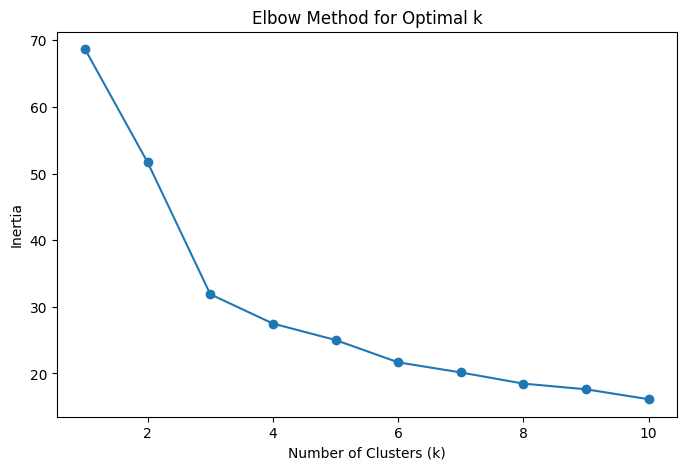

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define range for possible number of clusters
cluster_range = range(1, 11)
inertia = []

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Clustering_Data_Filtered[clustering_features])
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


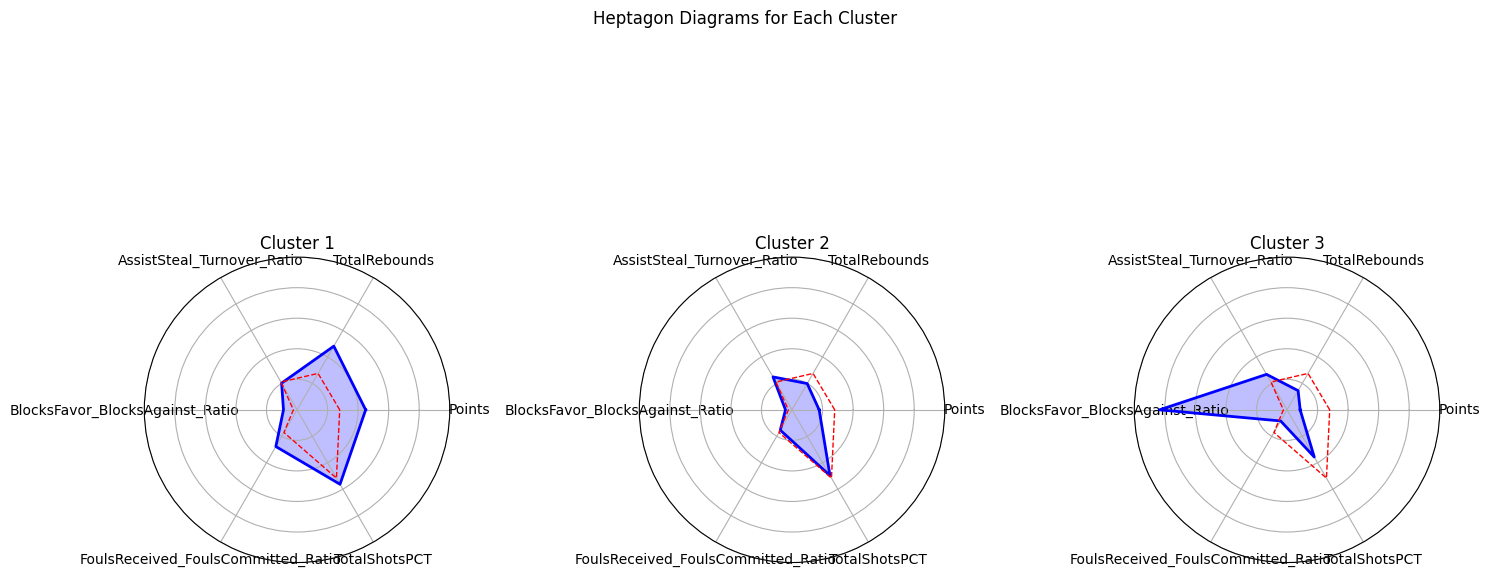

In [49]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Set the optimal number of clusters (from elbow method)
optimal_k = 3  # Replace with the actual k from elbow method

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Clustering_Data_Filtered[clustering_features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Clustering_Data_Filtered['Cluster'] = kmeans.fit_predict(scaled_data) + 1

# Compute min, max, and median across all players for radar chart normalization
feature_min = Clustering_Data_Filtered[clustering_features].min()
feature_max = Clustering_Data_Filtered[clustering_features].max()
feature_median = Clustering_Data_Filtered[clustering_features].median()

# Create radar plots (heptagons) for each cluster
angles = np.linspace(0, 2 * np.pi, len(clustering_features), endpoint=False).tolist()
angles += angles[:1]  # Ensure the plot closes the circle

fig, axs = plt.subplots(1, optimal_k, subplot_kw=dict(polar=True), figsize=(15, 8))
fig.suptitle("Hexagon Diagrams for Each Cluster")

for i in range(optimal_k):
    # Extract cluster center and normalize values between 0 and 1
    cluster_center = pd.DataFrame(scaler.inverse_transform([kmeans.cluster_centers_[i]]), columns=clustering_features)
    cluster_normalized = (cluster_center - feature_min) / (feature_max - feature_min)
    
    values = cluster_normalized.values.flatten().tolist()
    values += values[:1]  # Loop back to the start for the closed shape

    # Plot each heptagon
    ax = axs[i]
    ax.plot(angles, values, color='b', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='b', alpha=0.25)

    # Add median line
    median_normalized = ((feature_median - feature_min) / (feature_max - feature_min)).values.flatten().tolist()
    median_normalized += median_normalized[:1]
    ax.plot(angles, median_normalized, color='r', linewidth=1, linestyle='dashed')

    # Customize plot appearance
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(clustering_features, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f'Cluster {i + 1}')

plt.tight_layout()
plt.show()


In [50]:
Clustering_Data_Filtered.Cluster.value_counts()

Cluster
2    167
1    128
3     30
Name: count, dtype: int64

In [51]:
# Merge the Cluster column into the original df dataframe
df_with_clusters = df.merge(Clustering_Data_Filtered[['Player_ID', 'Cluster']], on='Player_ID', how='left')

In [52]:
df_with_clusters.Cluster.value_counts(dropna=False)

Cluster
1.0    4793
2.0    3767
3.0     530
NaN     174
Name: count, dtype: int64

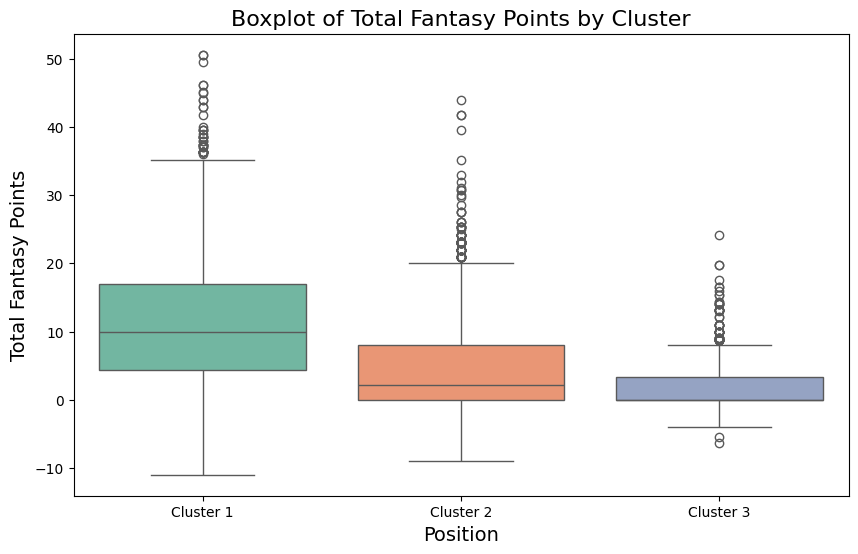

In [71]:
# Create a boxplot for total_fp across positions
import seaborn as sns
titles = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='total_fp', data=df_with_clusters, palette='Set2', hue='Cluster', legend=False)
plt.title('Boxplot of Total Fantasy Points by Cluster', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Total Fantasy Points', fontsize=14)
plt.xticks(ticks=[0,1,2], labels=titles)
plt.show()

In [58]:
df_with_clusters.columns

Index(['Season', 'Gamecode', 'Home', 'Player_ID', 'IsStarter', 'IsPlaying',
       'Team', 'Dorsal', 'Player', 'Minutes', 'Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds',
       'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived', 'Valuation', 'Plusminus', 'gamecode', 'group',
       'datetime', 'TeamScore', 'OpponentScore', 'PlayerName', 'total_fp',
       'Cluster'],
      dtype='object')

In [68]:

# Select relevant columns, grouping by 'Cluster' and 'Player_ID' to calculate averages
averages_df = (
    df_with_clusters.groupby(['Cluster', 'Player_ID', 'Player'])
    .agg(
        minutes_avg=('Minutes', 'mean'),
        total_fp_avg=('total_fp', 'mean'),
        **{f'{action}_avg': (action, 'mean') for action in scoring_actions}
    )
    .reset_index()
)

# Split into individual dataframes by cluster
df_cluster_1 = averages_df[averages_df['Cluster'] == 1][['Player_ID', 'Player', 'minutes_avg', 'total_fp_avg'] + [f'{action}_avg' for action in scoring_actions]]
df_cluster_2 = averages_df[averages_df['Cluster'] == 2][['Player_ID', 'Player', 'minutes_avg', 'total_fp_avg'] + [f'{action}_avg' for action in scoring_actions]]
df_cluster_3 = averages_df[averages_df['Cluster'] == 3][['Player_ID', 'Player', 'minutes_avg', 'total_fp_avg'] + [f'{action}_avg' for action in scoring_actions]]


In [66]:
df_cluster_1.Player.value_counts().index.to_list()

['MIROTIC, NIKOLA',
 'NEDOVIC, NEMANJA',
 'OKOBO, ELIE',
 'NEBO, JOSH',
 'HALL, DONTA',
 'PETRUSEV, FILIP',
 'MOTLEY, JOHNATHAN',
 'ROGKAVOPOULOS, NIKOLAOS',
 'THOMPSON, DARIUS',
 'SMAILAGIC, ALEN',
 'KOUMADJE, KHALIFA',
 'LUNDBERG, IFFE',
 'CANAAN, ISAIAH',
 'JONES, CHRIS',
 'COSTELLO, MATTHEW',
 'PRADILLA, JAIME',
 'HAYES, KEVARRIUS',
 'YABUSELE, GUERSCHON',
 'POYTHRESS, ALEX',
 'BALDWIN IV, WADE',
 'PUNTER, KEVIN',
 'DORSEY, TYLER',
 'BRYANT, ELIJAH',
 'COLSON, BONZIE',
 'BROWN, LORENZO',
 'CORDINIER, ISAIA',
 'MILLER-MCINTYRE, CODI',
 'BOLOMBOY, JOEL',
 'DECK, GABRIEL',
 'LEDAY, ZACH',
 'BOLMARO, LEANDRO',
 'RIVERO, JASIEL',
 'EVANS, KEENAN',
 'SORKIN, ROMAN',
 'MONEKE, CHIMA',
 'BELINELLI, MARCO',
 'LEE, SABEN',
 'WRIGHT, MOSES',
 'OTURU, DAN',
 'NUNN, KENDRICK',
 'PARKER, JABARI',
 'KAMINSKY, FRANK',
 'DOZIER JR, PERRY',
 'SCOTT, MIKE',
 'BEAN, JUSTIN',
 'BROWN, STERLING',
 'MANEK, BRADY',
 'HERNANGOMEZ, JUANCHO',
 'CABOCLO, BRUNO',
 'ANTETOKOUNMPO, KOSTAS',
 'LUWAWU-CABARROT, TI

In [69]:
df_cluster_2.Player.value_counts().index.to_list()

['JACKSON, EDWIN',
 'SESTINA, NATHAN',
 'YAACOV, NOAM',
 'MAYER, OMER',
 'RAPIEQUE, ELIAS',
 'KAMAGATE, ISMAEL',
 'GILLESPIE, FREDDIE',
 'ILIC, DALIBOR',
 'MITROU-LONG, NAZ',
 'HARPER, JARED',
 'BRAZDEIKIS, IGNAS',
 'MITCHELL, MATTHEW',
 'KHARCHENKOV, IVAN',
 'MORGAN, MATTHEW',
 'TUCKER, RAYJON',
 'BALDWIN, KAMAR',
 'WILLIAMS, TREVION',
 'SHORTS, TJ',
 'MALCOLM, COLLIN',
 'WARD, TYSON',
 'NOAM, YAACOV',
 'HALL, DEVON',
 'GRANT, JERIAN',
 'HAZER, SEHMUS',
 'WILLIS, DEREK',
 'LOYD, JORDAN',
 'HOLLINS, AUSTIN',
 'BRIZUELA, DARIO',
 'NUNEZ, JUAN',
 'WEILER-BABB, NICK',
 'LARENTZAKIS, GIANNOULIS',
 'GAZI, ERTEN',
 'SAKO, NEAL',
 'PIERRE, DYSHAWN',
 'BROWN, JOHN',
 'ALOCEN, CARLOS',
 'KOPRIVICA, BALSA',
 'MADAR, YAM',
 'MANNION, NICCOLO',
 'SMITH, JALEEN',
 'BLATT, TAMIR',
 'JANTUNEN, MIKAEL',
 'HIFI, NADIR',
 'CLAVER, VICTOR',
 'RANDOLPH, LEVI',
 'FORREST, TRENT',
 'JONES, CARLIK',
 'HARRISON, SHAQUILLE',
 'CAVALIERE, LEOPOLD',
 'DIOUF, MOUHAMET',
 'METU, CHIMEZIE',
 'FOURNIER, EVAN',
 'RAY

In [72]:
df_with_clusters.Cluster.value_counts()

Cluster
1.0    4793
2.0    3767
3.0     530
Name: count, dtype: int64

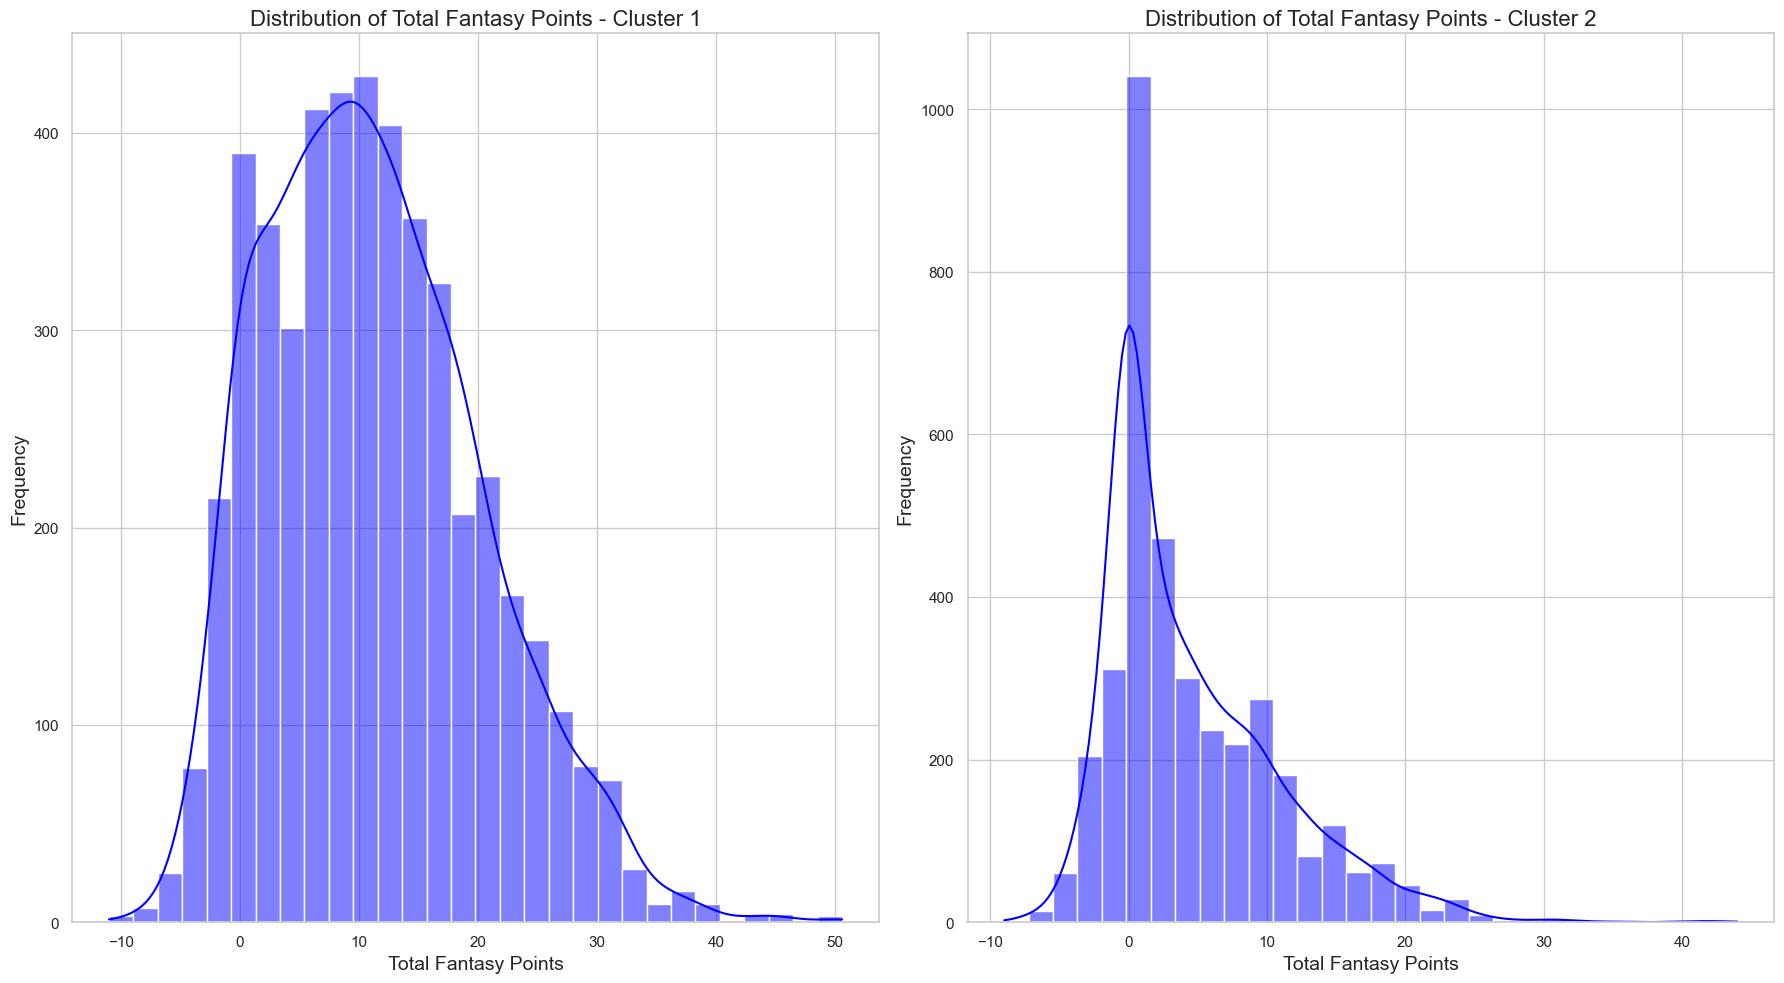

In [73]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a 3x1 subplot for the histogram
fig, axes = plt.subplots(1,2, figsize=(18, 10))

# Define positions and corresponding titles
clusters = [1, 2]
titles = ['Cluster 1', 'Cluster 2']

# Loop through positions and plot each distribution
for ax, cl, title in zip(axes, clusters, titles):
    sns.histplot(df_with_clusters[df_with_clusters['Cluster'] == cl]['total_fp'], 
                 bins=30, kde=True, color='blue', ax=ax)
    ax.set_title(f'Distribution of Total Fantasy Points - {title}', fontsize=16)
    ax.set_xlabel('Total Fantasy Points', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [74]:
df_with_clusters.to_csv('All_players_Clustered.csv', index=False)